<a href="https://colab.research.google.com/github/Renato-M-Pereira/Python-projetos/blob/main/Projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sobre o Projeto**

Esse é o projeto n°1 do curso **"Python para análise de dados"**, com os instrutotes **Odemir Depieri Jr** e **Ronisson Lucas Calmon**.

Nesse projeto usamos uma base de dados sobre empresas 'Unicórnio', que são empresas que ultrapassam 1 Bilhão de dólares em valor de mercado, conseguimos extrair informações como País que mais cria 'unicórnio', País que mais gera valor, entre outros. Foi possível criar gráficos e visualizações que auxiliam no projeto. 

In [2]:
# Importando as libs 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Ler a base de dados
bd = pd.read_csv('Startups+in+2021+end.csv')

In [5]:
# Verificar a base de dados
bd.shape

(936, 8)

In [6]:
# Visualizar as primeiras linhas
bd.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [7]:
# Ver o nome de todas as colunas
bd.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [8]:
# Traduzir o nome das colunas
bd.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores',
}, inplace=True)

In [9]:
# Verificar tipo de informação
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [10]:
# Verifica campos nulos
bd.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

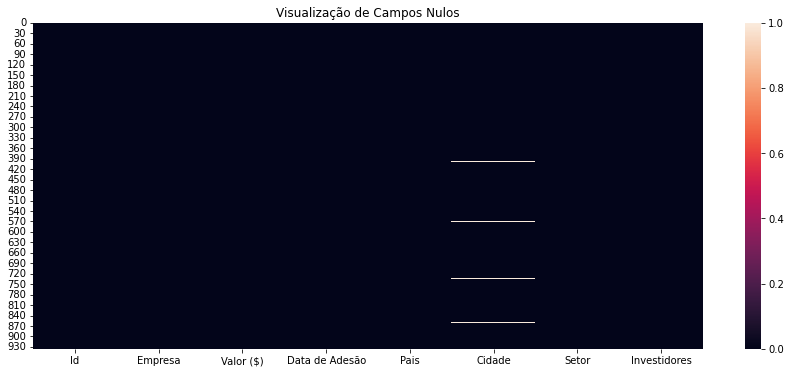

In [11]:
# Visualizando dados nulos no mapa de calor
plt.figure( figsize=(15,6))
plt.title('Visualização de Campos Nulos')
sns.heatmap(bd.isnull() );

In [12]:
# Ver campo únicos
bd.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [14]:
# Ver todos os valores únicos por coluna
bd['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [16]:
# Valores únicos com "value_counts"
bd['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [18]:
# Valores únicos com "normalize"
bd['Setor'].value_counts( normalize=True )

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

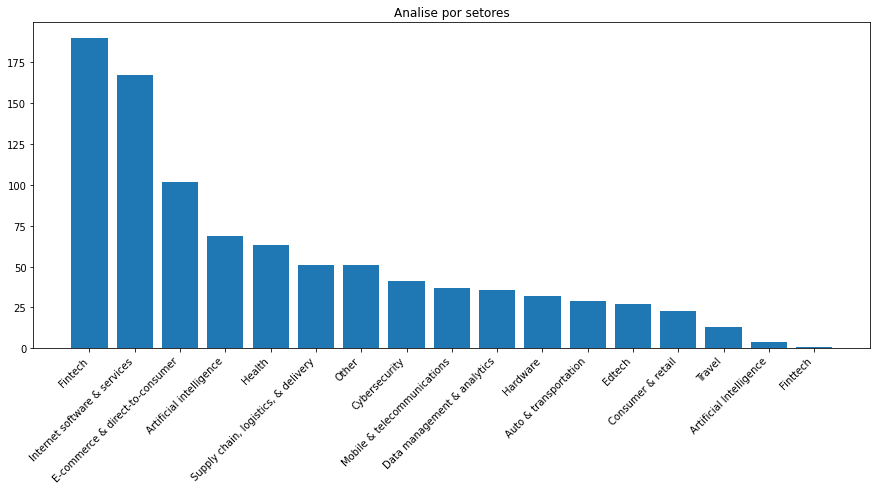

In [20]:
# Visualização por setores em gráfico  
plt.figure( figsize=(15,6) )
plt.title('Analise por setores')
plt.bar( bd['Setor'].value_counts().index, bd['Setor'].value_counts() )
plt.xticks( rotation=45, ha='right');

In [24]:
# Converter coluna para tipo correto dados
bd['Data de Adesão'] = pd.to_datetime( bd['Data de Adesão'])

bd['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [25]:
# extrair o Ano e o Mês
bd['Mes'] = pd.DatetimeIndex(bd['Data de Adesão']).month
bd['Ano'] = pd.DatetimeIndex(bd['Data de Adesão']).year

bd.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [27]:
# Tabela analitica
Analise_Agrupada =bd.groupby( by=['Pais', 'Ano', 'Mes'] ).count()['Id'].reset_index()

Analise_Agrupada

,Pais,Ano,Mes,Id
0,Argentina,2021,8,1
1,Australia,2018,1,1
2,Australia,2019,3,1
3,Australia,2021,5,1
4,Australia,2021,7,2
...,...,...,...,...
373,United States,2021,10,26
374,United States,2021,11,30
375,United States,2021,12,8
376,"United States,",2021,9,1


In [28]:
# Análise agrupada por Pais
Analise_Agrupada[
  Analise_Agrupada['Pais'] == 'Brazil'               
]

,Pais,Ano,Mes,Id
11,Brazil,2018,3,1
12,Brazil,2018,7,1
13,Brazil,2018,11,1
14,Brazil,2019,6,1
15,Brazil,2019,9,1
16,Brazil,2019,10,1
17,Brazil,2019,12,1
18,Brazil,2020,1,1
19,Brazil,2020,12,2
20,Brazil,2021,1,1


In [46]:
# Ordenar por valor
Analise_Valor = bd.groupby( by=['Pais']).sum()['Valor ($)'].reset_index().sort_values('Valor ($)', ascending=False)

Analise_Valor.head()

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


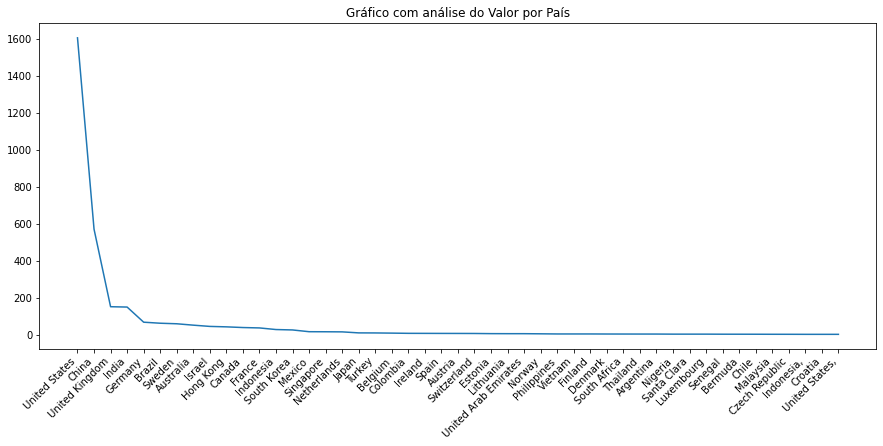

In [50]:
# Gerando um gráfico de Valor x Pais
plt.figure( figsize=(15,6) )
plt.title('Gráfico com análise do Valor por País')
plt.plot( Analise_Valor['Pais'], Analise_Valor['Valor ($)'])
plt.xticks( rotation=45, ha='right');